The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-04-10 01:15:01,014 — TRAIN — INFO — Number images to process 50
2024-04-10 01:15:01,014 — TRAIN — INFO — Train data size 40, test data size 10
2024-04-10 01:15:01,179 — TRAIN — INFO — TRAIN STARTS ...


  7%|▋         | 1/15 [00:00<00:11,  1.27it/s]

Epoch: 1 | train_loss: 0.9284 | train_acc: 0.3333 | test_loss: 0.7942 | test_acc: 0.1000


 13%|█▎        | 2/15 [00:01<00:07,  1.85it/s]

Epoch: 2 | train_loss: 0.2416 | train_acc: 0.9792 | test_loss: 0.2819 | test_acc: 1.0000


 20%|██        | 3/15 [00:01<00:05,  2.31it/s]

Epoch: 3 | train_loss: 0.0910 | train_acc: 0.9792 | test_loss: 0.1140 | test_acc: 1.0000


 27%|██▋       | 4/15 [00:01<00:04,  2.44it/s]

Epoch: 4 | train_loss: 0.0285 | train_acc: 1.0000 | test_loss: 0.0537 | test_acc: 1.0000


 33%|███▎      | 5/15 [00:02<00:03,  2.67it/s]

Epoch: 5 | train_loss: 0.0129 | train_acc: 1.0000 | test_loss: 0.0273 | test_acc: 1.0000


 40%|████      | 6/15 [00:02<00:03,  2.74it/s]

Epoch: 6 | train_loss: 0.0096 | train_acc: 1.0000 | test_loss: 0.0142 | test_acc: 1.0000


 47%|████▋     | 7/15 [00:02<00:02,  2.80it/s]

Epoch: 7 | train_loss: 0.0075 | train_acc: 1.0000 | test_loss: 0.0086 | test_acc: 1.0000


 53%|█████▎    | 8/15 [00:03<00:02,  2.88it/s]

Epoch: 8 | train_loss: 0.0041 | train_acc: 1.0000 | test_loss: 0.0050 | test_acc: 1.0000


 60%|██████    | 9/15 [00:03<00:02,  2.78it/s]

Epoch: 9 | train_loss: 0.0024 | train_acc: 1.0000 | test_loss: 0.0028 | test_acc: 1.0000


 67%|██████▋   | 10/15 [00:03<00:01,  2.85it/s]

Epoch: 10 | train_loss: 0.0021 | train_acc: 1.0000 | test_loss: 0.0018 | test_acc: 1.0000


 73%|███████▎  | 11/15 [00:04<00:01,  2.89it/s]

Epoch: 11 | train_loss: 0.0020 | train_acc: 1.0000 | test_loss: 0.0013 | test_acc: 1.0000


 80%|████████  | 12/15 [00:04<00:01,  2.94it/s]

Epoch: 12 | train_loss: 0.0020 | train_acc: 1.0000 | test_loss: 0.0012 | test_acc: 1.0000


 87%|████████▋ | 13/15 [00:04<00:00,  2.81it/s]

Epoch: 13 | train_loss: 0.0011 | train_acc: 1.0000 | test_loss: 0.0012 | test_acc: 1.0000


 93%|█████████▎| 14/15 [00:05<00:00,  2.92it/s]

Epoch: 14 | train_loss: 0.0011 | train_acc: 1.0000 | test_loss: 0.0012 | test_acc: 1.0000


100%|██████████| 15/15 [00:05<00:00,  2.69it/s]

Epoch: 15 | train_loss: 0.0012 | train_acc: 1.0000 | test_loss: 0.0013 | test_acc: 1.0000
2024-04-10 01:15:06,763 — TRAIN — INFO — TRAIN COMPLEATES.
2024-04-10 01:15:06,763 — TRAIN — INFO — Current directory d:\GD Anton\dev\data\02_problems\2022-07_Yandes_ML_Test\06_bio


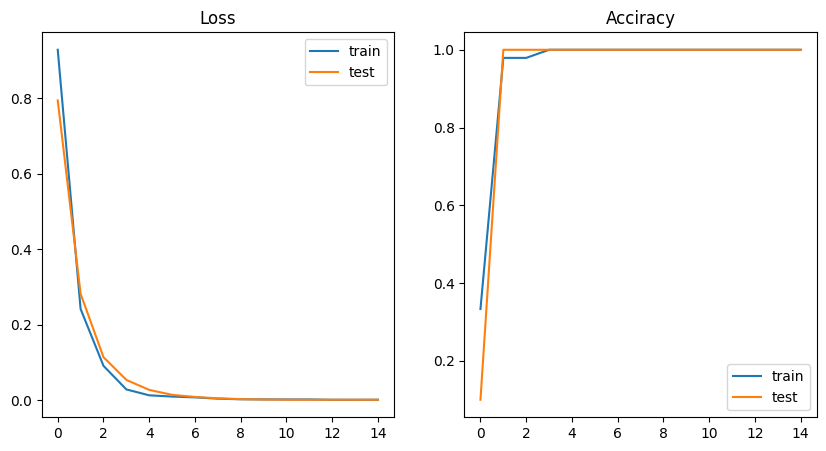

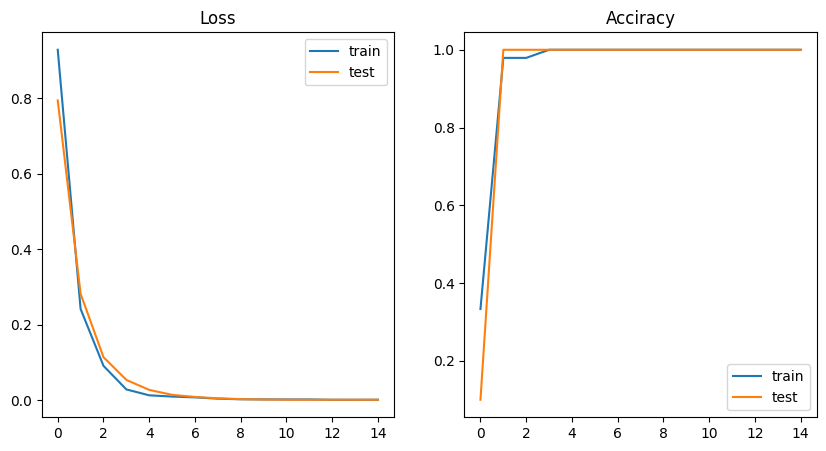

In [3]:
%load_ext autoreload
%autoreload 2

# Load Libs
from src.stages.train import train_model
from mllib.pytorch.plot import plot_results


results = train_model()
plot_results(results=results)

In [91]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from src.utils.files import make_folder, load_params
from pathlib import Path

params = load_params()

results_path = Path(params['results']['train_results'])
data = pd.DataFrame(results)
make_folder(results_path.parent)
data.to_csv(results_path, index=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
